In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/income-classification/income_evaluation.csv


# Veri Ön İşleme ve Temizleme Geliştirmeleri

In [2]:
df = pd.read_csv("/kaggle/input/income-classification/income_evaluation.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [6]:
col_names = ["age" , "workclass" , "finalweight" ,"education" , "education_num" , "marital_status" , "occupaiton" , "relationship" , "race" , "sex" , "capital_gain" , "capital_loss" , "hours_per_week" , "native_country" , "income"]

In [7]:
df.columns = col_names

In [8]:
df.columns

Index(['age', 'workclass', 'finalweight', 'education', 'education_num',
       'marital_status', 'occupaiton', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   finalweight     32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupaiton      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.describe()

,age,finalweight,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
df.isnull().sum()

age               0
workclass         0
finalweight       0
education         0
education_num     0
marital_status    0
occupaiton        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [12]:
for col in df.columns :
    if df[col].dtype == "O":
        print(col)

workclass
education
marital_status
occupaiton
relationship
race
sex
native_country
income


In [13]:
categorical = [col for col in df.columns if df[col].dtype == "O"]
numerical = [col for col in df.columns if df[col].dtype != "O"]

In [14]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupaiton',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [15]:
numerical

['age',
 'finalweight',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [16]:
df[categorical]

,workclass,education,marital_status,occupaiton,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [17]:
df[categorical].head()

,workclass,education,marital_status,occupaiton,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [18]:
for col in categorical : 
    print(df[col].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupaiton
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

In [19]:
df["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

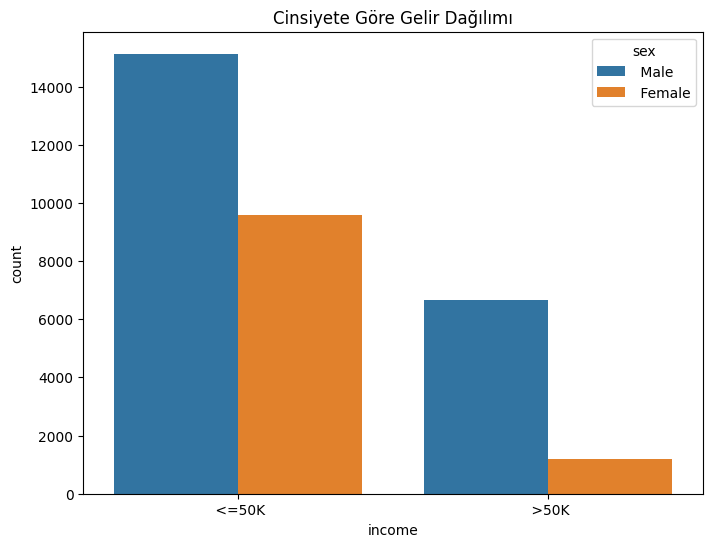

In [20]:
fig , ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x = "income" , hue = "sex" , data = df)
ax.set_title("Cinsiyete Göre Gelir Dağılımı")
plt.show()

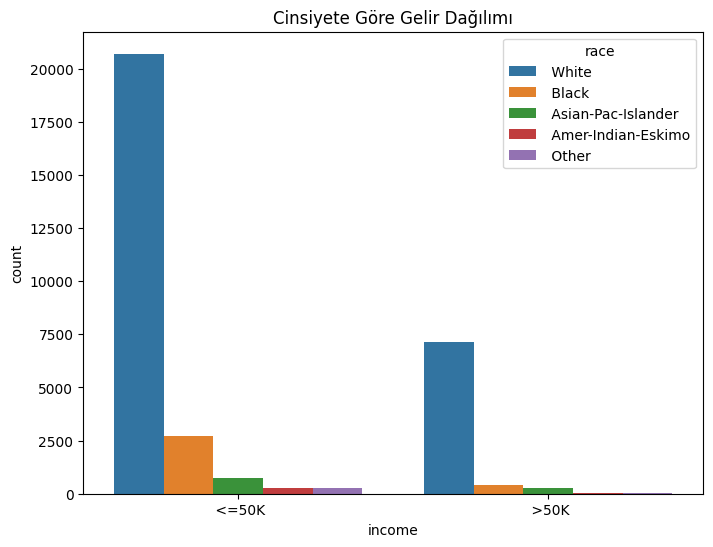

In [21]:
fig , ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x = "income" , hue = "race" , data = df)
ax.set_title("Cinsiyete Göre Gelir Dağılımı")
plt.show()

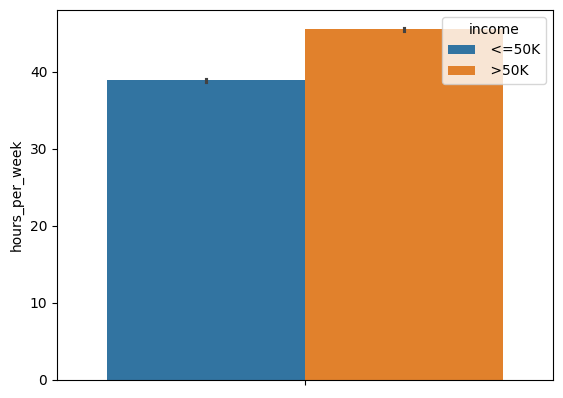

In [22]:
sns.barplot(y=df["hours_per_week"] , hue = df["income"])
plt.show()

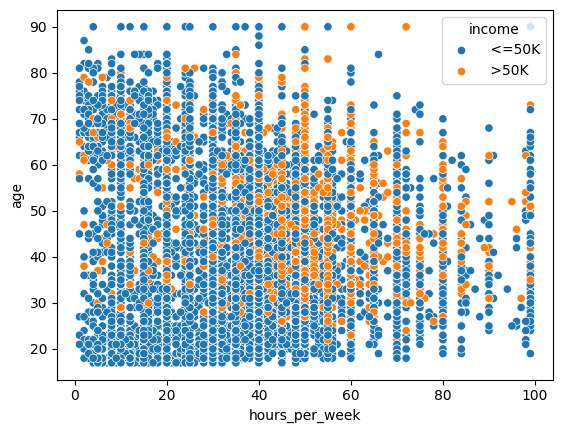

In [23]:
sns.scatterplot(x=df["hours_per_week"] , y = df["age"] , hue =  df["income"])
plt.show()

In [24]:
over_40_hours = df[df["hours_per_week"] > 40]
under_40_hours = df[df["hours_per_week"] <= 40]

In [25]:
over_40_hours["income"].value_counts()

income
<=50K    5725
>50K     3856
Name: count, dtype: int64

In [26]:
under_40_hours["income"].value_counts()

income
<=50K    18995
>50K      3985
Name: count, dtype: int64

In [27]:
df["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [28]:
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [29]:
df["workclass"] = df["workclass"].replace(" ?" , np.nan)

In [30]:
df["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [31]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupaiton',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [32]:
df["education"].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [33]:
df["marital_status"].value_counts()

marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [34]:
df["occupaiton"].value_counts()

occupaiton
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [35]:
df["occupaiton"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [36]:
df["occupaiton"] = df["occupaiton"].replace(" ?" , np.nan)

In [37]:
df["relationship"].value_counts()

relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

In [38]:
df["race"].value_counts()

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

In [39]:
df["sex"].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

In [40]:
df["native_country"].value_counts()

native_country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [41]:
df["native_country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [42]:
df["native_country"] = df["native_country"].replace(" ?" , np.nan)

In [43]:
df["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [44]:
df.isnull().sum()

age                  0
workclass         1836
finalweight          0
education            0
education_num        0
marital_status       0
occupaiton        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

# Özellik Mühendisliği (Feature Engineering)

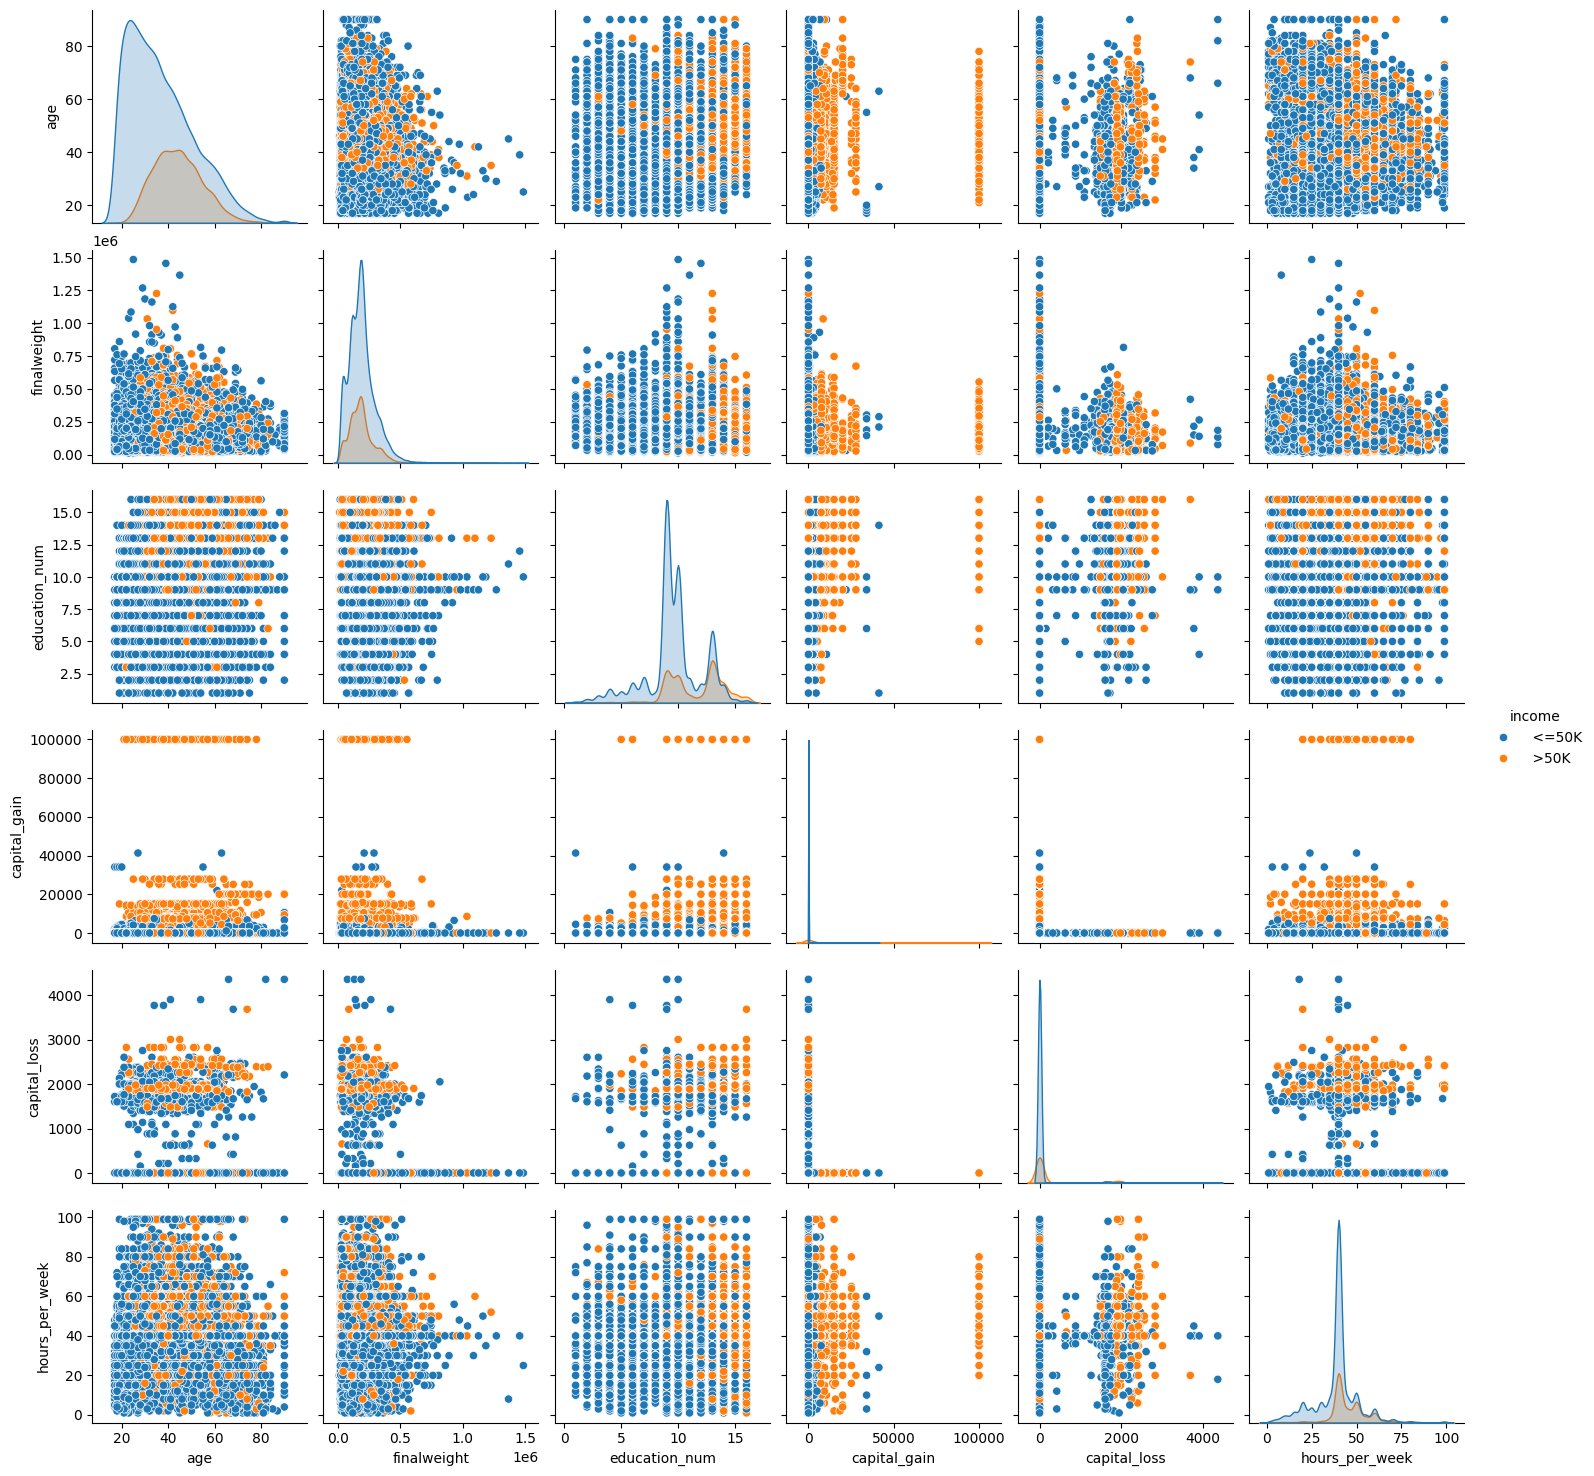

In [45]:
sns.pairplot(df ,  hue ="income")
plt.show()

In [46]:
X = df.drop("income" , axis = 1)
y = df["income"]

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size=0.3 , random_state=42)

In [49]:
categorical = [col for col in X_train.columns if X_train[col].dtype == "O"]

In [50]:
X_train[categorical]

,workclass,education,marital_status,occupaiton,relationship,race,sex,native_country
19749,Self-emp-not-inc,HS-grad,Married-civ-spouse,Farming-fishing,Wife,White,Female,United-States
1216,Self-emp-not-inc,Some-college,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,United-States
27962,State-gov,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
23077,Local-gov,HS-grad,Divorced,Exec-managerial,Not-in-family,White,Female,United-States
10180,Private,11th,Never-married,Priv-house-serv,Own-child,White,Female,United-States
...,...,...,...,...,...,...,...,...
29802,Private,Bachelors,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
5390,Private,12th,Divorced,Other-service,Unmarried,White,Female,United-States
860,Private,11th,Never-married,Adm-clerical,Own-child,White,Female,United-States
15795,Self-emp-not-inc,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States


In [51]:
X_train[categorical].isnull().sum()

workclass         1267
education            0
marital_status       0
occupaiton        1274
relationship         0
race                 0
sex                  0
native_country     405
dtype: int64

In [52]:
X_test[categorical].isnull().sum()

workclass         569
education           0
marital_status      0
occupaiton        569
relationship        0
race                0
sex                 0
native_country    178
dtype: int64

In [53]:
X_train["workclass"].mode()

0     Private
Name: workclass, dtype: object

In [54]:
X_train["workclass"].mode()[0]

' Private'

In [55]:
for i in [X_train , X_test]:
    i["workclass"] = i["workclass"].fillna(X_train["workclass"].mode()[0])
    i["occupaiton"] = i["occupaiton"].fillna(X_train["occupaiton"].mode()[0])
    i["native_country"] = i["native_country"].fillna(X_train["native_country"].mode()[0])

In [56]:
X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupaiton        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [57]:
X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupaiton        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [58]:
X_train[categorical].head()

,workclass,education,marital_status,occupaiton,relationship,race,sex,native_country
19749,Self-emp-not-inc,HS-grad,Married-civ-spouse,Farming-fishing,Wife,White,Female,United-States
1216,Self-emp-not-inc,Some-college,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,United-States
27962,State-gov,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
23077,Local-gov,HS-grad,Divorced,Exec-managerial,Not-in-family,White,Female,United-States
10180,Private,11th,Never-married,Priv-house-serv,Own-child,White,Female,United-States


In [59]:
df[categorical].nunique()

workclass          8
education         16
marital_status     7
occupaiton        14
relationship       6
race               5
sex                2
native_country    41
dtype: int64

In [60]:
y_train

19749     <=50K
1216       >50K
27962     <=50K
23077     <=50K
10180     <=50K
          ...  
29802     <=50K
5390      <=50K
860       <=50K
15795     <=50K
23654     <=50K
Name: income, Length: 22792, dtype: object

In [61]:
y_train_binary = y_train.apply(lambda x : 1 if x.strip() == ">50K" else 0 )

In [62]:
y_train_binary.groupby(X_train["native_country"]).mean()

native_country
Cambodia                      0.357143
Canada                        0.321429
China                         0.192308
Columbia                      0.021739
Cuba                          0.246154
Dominican-Republic            0.039216
Ecuador                       0.050000
El-Salvador                   0.078947
England                       0.353846
France                        0.523810
Germany                       0.273684
Greece                        0.285714
Guatemala                     0.042553
Haiti                         0.093750
Holand-Netherlands            0.000000
Honduras                      0.000000
Hong                          0.454545
Hungary                       0.100000
India                         0.449275
Iran                          0.448276
Ireland                       0.222222
Italy                         0.360000
Jamaica                       0.160714
Japan                         0.425532
Laos                          0.083333
Mexico    

In [63]:
target_means = y_train_binary.groupby(X_train["native_country"]).mean()

In [64]:
X_train["native_country_encoded"] = X_train["native_country"].map(target_means)
X_train["native_country_encoded"] = X_train["native_country_encoded"].fillna(y_train_binary.mean())

In [65]:
X_test["native_country_encoded"] = X_test["native_country"].map(target_means)
X_test["native_country_encoded"] = X_test["native_country_encoded"].fillna(y_train_binary.mean())

In [66]:
X_train.head()

,age,workclass,finalweight,education,education_num,marital_status,occupaiton,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,native_country_encoded
19749,34,Self-emp-not-inc,56460,HS-grad,9,Married-civ-spouse,Farming-fishing,Wife,White,Female,0,2179,12,United-States,0.248267
1216,48,Self-emp-not-inc,243631,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,7688,0,40,United-States,0.248267
27962,23,State-gov,56402,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,30,United-States,0.248267
23077,56,Local-gov,255406,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,0.248267
10180,17,Private,297246,11th,7,Never-married,Priv-house-serv,Own-child,White,Female,0,0,9,United-States,0.248267


In [67]:
X_train = X_train.drop("native_country" , axis=1)

In [68]:
X_test = X_test.drop("native_country" , axis=1)

In [69]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupaiton',
 'relationship',
 'race',
 'sex',
 'native_country']

In [70]:
one_hot_categories = ['workclass',
 'education',
 'marital_status',
 'occupaiton',
 'relationship',
 'race',
 'sex']

In [71]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [72]:
encoder = ColumnTransformer(
    transformers = [
        ("cat" , OneHotEncoder(handle_unknown = "ignore" , sparse_output=False) , one_hot_categories)
    ] , remainder = "passthrough"
)

In [73]:
X_train_enc = encoder.fit_transform(X_train)
X_test_enc = encoder.transform(X_test)

In [74]:
X_train_enc

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.17900000e+03, 1.20000000e+01, 2.48266564e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.00000000e+01, 2.48266564e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.00000000e+01, 2.48266564e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.00000000e+01, 2.48266564e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.40000000e+01, 2.48266564e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 6.00000000e+01, 2.48266564e-01]])

In [75]:
columns=encoder.get_feature_names_out()

In [76]:
columns

array(['cat__workclass_ Federal-gov', 'cat__workclass_ Local-gov',
       'cat__workclass_ Never-worked', 'cat__workclass_ Private',
       'cat__workclass_ Self-emp-inc', 'cat__workclass_ Self-emp-not-inc',
       'cat__workclass_ State-gov', 'cat__workclass_ Without-pay',
       'cat__education_ 10th', 'cat__education_ 11th',
       'cat__education_ 12th', 'cat__education_ 1st-4th',
       'cat__education_ 5th-6th', 'cat__education_ 7th-8th',
       'cat__education_ 9th', 'cat__education_ Assoc-acdm',
       'cat__education_ Assoc-voc', 'cat__education_ Bachelors',
       'cat__education_ Doctorate', 'cat__education_ HS-grad',
       'cat__education_ Masters', 'cat__education_ Preschool',
       'cat__education_ Prof-school', 'cat__education_ Some-college',
       'cat__marital_status_ Divorced',
       'cat__marital_status_ Married-AF-spouse',
       'cat__marital_status_ Married-civ-spouse',
       'cat__marital_status_ Married-spouse-absent',
       'cat__marital_status_ Never-mar

In [77]:
X_train = pd.DataFrame(X_train_enc , columns = columns , index = X_train.index)

In [78]:
X_test = pd.DataFrame(X_test_enc , columns = columns , index = X_test.index)

In [79]:
X_test

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__finalweight,remainder__education_num,remainder__capital_gain,remainder__capital_loss,remainder__hours_per_week,remainder__native_country_encoded
14160,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,27.0,160178.0,10.0,0.0,0.0,38.0,0.248267
27048,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,45.0,50567.0,9.0,0.0,0.0,40.0,0.248267
28868,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,29.0,185908.0,13.0,0.0,0.0,55.0,0.248267
5667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,30.0,190040.0,13.0,0.0,0.0,40.0,0.248267
7827,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,29.0,189346.0,10.0,2202.0,0.0,50.0,0.248267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32476,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,35.0,30673.0,8.0,0.0,0.0,84.0,0.248267
21100,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,24.0,51973.0,13.0,0.0,0.0,20.0,0.248267
27131,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,24.0,442274.0,9.0,0.0,0.0,40.0,0.248267
25526,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,56.0,178353.0,10.0,0.0,0.0,40.0,0.248267


In [80]:
cols = X_train.columns

In [81]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [82]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
X_train  = pd.DataFrame(X_train , columns=cols)

In [84]:
X_train

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__finalweight,remainder__education_num,remainder__capital_gain,remainder__capital_loss,remainder__hours_per_week,remainder__native_country_encoded
0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,-0.15,-1.018859,-0.333333,0.0,2179.0,-5.6,0.0
1,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.55,0.547177,0.000000,7688.0,0.0,0.0,0.0
2,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.70,-1.019344,0.000000,0.0,0.0,-2.0,0.0
3,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,0.95,0.645697,-0.333333,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,-1.0,-1.00,0.995766,-1.000000,0.0,0.0,-6.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.50,1.516311,1.000000,0.0,0.0,0.0,0.0
22788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,-0.30,-0.259524,-0.666667,0.0,0.0,-3.8,0.0
22789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,-1.0,-0.95,0.318368,-1.000000,0.0,0.0,-4.0,0.0
22790,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.65,-1.037258,-0.333333,0.0,0.0,8.8,0.0


In [85]:
X_test = pd.DataFrame(X_test , columns =cols)

In [86]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10 , random_state = 42)

In [87]:
rfc.fit(X_train , y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [88]:
y_pred = rfc.predict(X_test)

In [89]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [90]:
print(accuracy_score(y_test , y_pred))
print(classification_report(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))

0.8461459719520934
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7455
        >50K       0.72      0.58      0.64      2314

    accuracy                           0.85      9769
   macro avg       0.80      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769

[[6924  531]
 [ 972 1342]]


In [91]:
rfc = RandomForestClassifier(n_estimators = 100 , random_state = 42)
rfc.fit(X_train , y_train)
y_pred = rfc.predict(X_test)

print(accuracy_score(y_test , y_pred))
print(classification_report(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))

0.8548469648889344
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7455
        >50K       0.73      0.62      0.67      2314

    accuracy                           0.85      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.85      0.85      9769

[[6908  547]
 [ 871 1443]]


In [92]:
rfc.feature_importances_

array([5.88383703e-03, 6.14739042e-03, 4.71867980e-06, 1.12894607e-02,
       5.92231809e-03, 8.56452234e-03, 4.63905359e-03, 9.71432418e-05,
       1.22584224e-03, 1.77760994e-03, 7.89815240e-04, 2.48090371e-04,
       5.79130469e-04, 1.81865221e-03, 1.20241077e-03, 2.46808775e-03,
       2.88604934e-03, 1.30247635e-02, 3.85500746e-03, 7.66429960e-03,
       6.83716283e-03, 3.96338134e-05, 5.22927434e-03, 5.20012967e-03,
       6.58958126e-03, 4.20979686e-04, 7.61659072e-02, 8.11170105e-04,
       2.18016756e-02, 1.65370795e-03, 1.49016695e-03, 6.29145123e-03,
       3.20094783e-06, 7.55915585e-03, 1.74847671e-02, 4.57559550e-03,
       3.45843225e-03, 4.56317652e-03, 5.86517815e-03, 8.72173588e-05,
       1.07941013e-02, 3.01022887e-03, 7.98168871e-03, 5.17721640e-03,
       4.79810079e-03, 4.22937340e-02, 1.05718616e-02, 1.38916129e-03,
       7.85952675e-03, 4.85100682e-03, 9.68164876e-03, 1.19640307e-03,
       3.53204497e-03, 5.09994508e-03, 7.80285824e-04, 6.98967322e-03,
      

In [93]:
pd.Series(rfc.feature_importances_ , index =X_train.columns)

cat__workclass_ Federal-gov          0.005884
cat__workclass_ Local-gov            0.006147
cat__workclass_ Never-worked         0.000005
cat__workclass_ Private              0.011289
cat__workclass_ Self-emp-inc         0.005922
                                       ...   
remainder__education_num             0.070071
remainder__capital_gain              0.095840
remainder__capital_loss              0.030534
remainder__hours_per_week            0.083737
remainder__native_country_encoded    0.016635
Length: 65, dtype: float64

In [94]:
pd.Series(rfc.feature_importances_ , index =X_train.columns).sort_values()

cat__occupaiton_ Armed-Forces              0.000003
cat__workclass_ Never-worked               0.000005
cat__education_ Preschool                  0.000040
cat__occupaiton_ Priv-house-serv           0.000087
cat__workclass_ Without-pay                0.000097
                                             ...   
cat__marital_status_ Married-civ-spouse    0.076166
remainder__hours_per_week                  0.083737
remainder__capital_gain                    0.095840
remainder__age                             0.149574
remainder__finalweight                     0.155890
Length: 65, dtype: float64

In [95]:
feature_scores = pd.Series(rfc.feature_importances_ , index =X_train.columns).sort_values(ascending =False)

In [96]:
feature_scores

remainder__finalweight                     0.155890
remainder__age                             0.149574
remainder__capital_gain                    0.095840
remainder__hours_per_week                  0.083737
cat__marital_status_ Married-civ-spouse    0.076166
                                             ...   
cat__workclass_ Without-pay                0.000097
cat__occupaiton_ Priv-house-serv           0.000087
cat__education_ Preschool                  0.000040
cat__workclass_ Never-worked               0.000005
cat__occupaiton_ Armed-Forces              0.000003
Length: 65, dtype: float64

In [97]:
feature_scores.tail(10)

cat__education_ 12th                      0.000790
cat__race_ Other                          0.000780
cat__education_ 5th-6th                   0.000579
cat__marital_status_ Married-AF-spouse    0.000421
cat__education_ 1st-4th                   0.000248
cat__workclass_ Without-pay               0.000097
cat__occupaiton_ Priv-house-serv          0.000087
cat__education_ Preschool                 0.000040
cat__workclass_ Never-worked              0.000005
cat__occupaiton_ Armed-Forces             0.000003
dtype: float64

In [98]:
X_train = X_train.drop(["cat__education_ 12th" , "cat__race_ Other" , "cat__education_ 5th-6th" , "cat__marital_status_ Married-AF-spouse" ,"cat__education_ 1st-4th" , "cat__workclass_ Without-pay" , "cat__occupaiton_ Priv-house-serv" , "cat__education_ Preschool" , "cat__workclass_ Never-worked" , "cat__occupaiton_ Armed-Forces"] , axis =1)

In [99]:
X_test = X_test.drop(["cat__education_ 12th" , "cat__race_ Other" , "cat__education_ 5th-6th" , "cat__marital_status_ Married-AF-spouse" ,"cat__education_ 1st-4th" , "cat__workclass_ Without-pay" , "cat__occupaiton_ Priv-house-serv" , "cat__education_ Preschool" , "cat__workclass_ Never-worked" , "cat__occupaiton_ Armed-Forces"] , axis =1)

In [100]:
rfc = RandomForestClassifier(n_estimators = 100 , random_state = 42)
rfc.fit(X_train , y_train)
y_pred = rfc.predict(X_test)

print(accuracy_score(y_test , y_pred))
print(classification_report(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))

0.8540280479066434
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7455
        >50K       0.72      0.62      0.67      2314

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769

[[6904  551]
 [ 875 1439]]


In [101]:
from sklearn.model_selection import RandomizedSearchCV

In [102]:
rfc = RandomForestClassifier()

In [103]:
rf_params = {
    "n_estimators" : [100 , 200 , 500 , 1000],
    "max_depth" : [5 , 8 , 10 , 15 , None],
    "max_features" : ["sqrt" , "log2" , 5 , 6 , 7 , 8],
    "min_samples_split" : [2 , 8 , 15 , 20]
}

In [104]:
rscv = RandomizedSearchCV(estimator = rfc , param_distributions = rf_params , cv = 3 , n_jobs = -1)
rscv.fit(X_train , y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 10, 15, None],
                                        'max_features': ['sqrt', 'log2', 5, 6,
                                                         7, 8],
                                        'min_samples_split': [2, 8, 15, 20],
                                        'n_estimators': [100, 200, 500, 1000]})

In [105]:
y_pred = rscv.predict(X_test)


print(accuracy_score(y_test , y_pred))
print(classification_report(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))

0.8647763332992118
              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91      7455
        >50K       0.76      0.62      0.69      2314

    accuracy                           0.86      9769
   macro avg       0.83      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769

[[7004  451]
 [ 870 1444]]


In [106]:
rscv.best_params_

{'n_estimators': 200,
 'min_samples_split': 20,
 'max_features': 6,
 'max_depth': None}

# Ekstra Kendi Çalışmalarım

--- Random Forest Sonuçları ---
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      4945
           1       0.68      0.63      0.65      1568

    accuracy                           0.84      6513
   macro avg       0.78      0.77      0.77      6513
weighted avg       0.84      0.84      0.84      6513



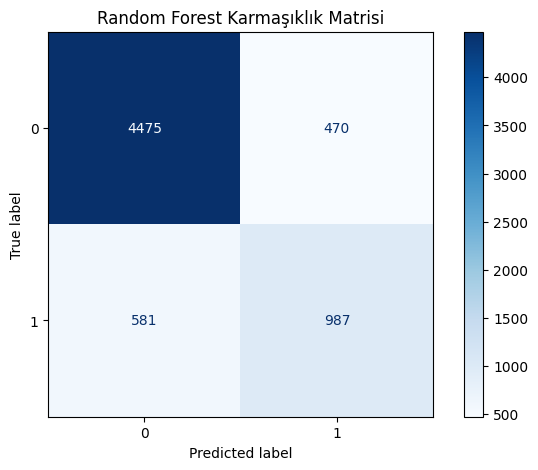


--- XGBoost Sonuçları ---
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      4945
           1       0.72      0.74      0.73      1568

    accuracy                           0.87      6513
   macro avg       0.82      0.82      0.82      6513
weighted avg       0.87      0.87      0.87      6513



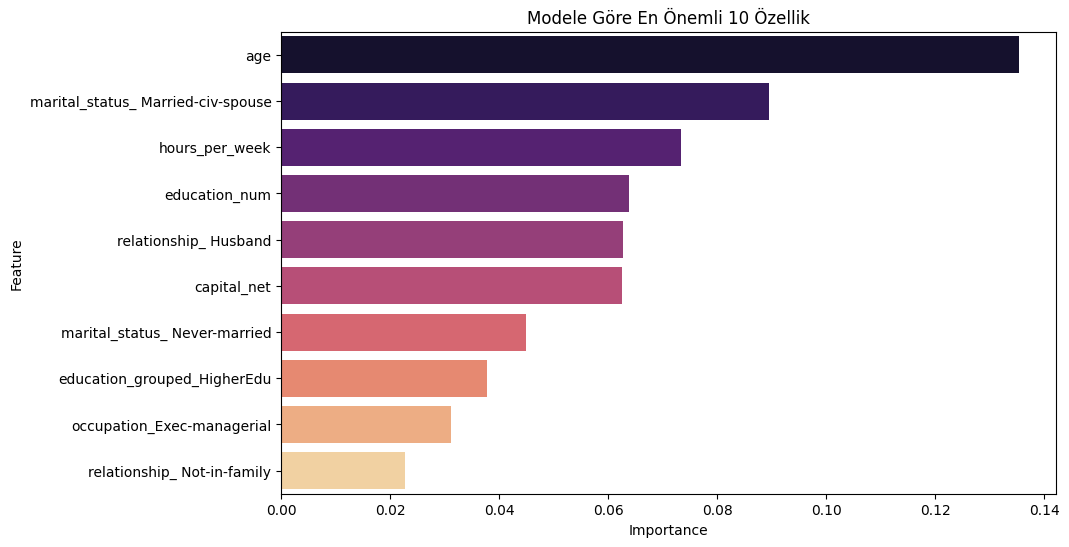

In [107]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

warnings.filterwarnings('ignore')


df = pd.read_csv("/kaggle/input/income-classification/income_evaluation.csv")
col_names = ["age", "workclass", "finalweight", "education", "education_num", 
             "marital_status", "occupation", "relationship", "race", "sex", 
             "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"]
df.columns = col_names


cols_with_missing = ['workclass', 'occupation', 'native_country']
for col in cols_with_missing:
    df[col] = df[col].str.strip().replace('?', df[col].mode()[0])


df['capital_net'] = df['capital_gain'] - df['capital_loss']


def group_education(edu):
    edu = edu.strip()
    if edu in ['1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Preschool']:
        return 'School'
    elif edu in ['HS-grad']:
        return 'HighGrad'
    elif edu in ['Bachelors', 'Masters', 'Doctorate']:
        return 'HigherEdu'
    else:
        return 'Other'

df['education_grouped'] = df['education'].apply(group_education)


df['age_group'] = pd.cut(df['age'], bins=[0, 25, 45, 65, 100], labels=['Young', 'Middle-Aged', 'Senior', 'Old'])


df.drop(['finalweight', 'education', 'capital_gain', 'capital_loss'], axis=1, inplace=True)


X = df.drop('income', axis=1)
y = df['income'].str.strip().apply(lambda x: 1 if x == '>50K' else 0)


categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ], remainder='passthrough')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


model_rf = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])


model_rf.fit(X_train, y_train)


y_pred_rf = model_rf.predict(X_test)
print("--- Random Forest Sonuçları ---")
print(classification_report(y_test, y_pred_rf))


fig, ax = plt.subplots(figsize=(8, 5))
ConfusionMatrixDisplay.from_estimator(model_rf, X_test, y_test, cmap='Blues', ax=ax)
plt.title("Random Forest Karmaşıklık Matrisi")
plt.show()


model_xgb = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
print("\n--- XGBoost Sonuçları ---")
print(classification_report(y_test, y_pred_xgb))


ohe_feature_names = model_rf.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_cols)
all_feature_names = list(ohe_feature_names) + numerical_cols

importances = model_rf.named_steps['classifier'].feature_importances_
feat_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='magma')
plt.title('Modele Göre En Önemli 10 Özellik')
plt.show()